In [2]:
###  Make word cloud for each category

#import modules
import sys
import os
import pandas as pd

In [3]:
# read all file and and collect title of each files in a category
# Global path variables
base_dir = os.path.dirname(os.path.dirname(os.path.abspath(sys.argv[1])))
ip_dir = os.path.join(base_dir, 'data')
print(ip_dir)
print(os.path.exists(ip_dir)) # cheking wether ip dir exists or not!
file_list = os.listdir(ip_dir)
print('Total No of Files :' ,len(file_list))
file_list.sort()
file_list[:10]

/home/durgesh/code_dir/youtube-trend-analysis/data
True
Total No of Files : 222


['18.01.11_GB_videos.csv',
 '18.01.11_IN_videos.csv',
 '18.01.11_US_videos.csv',
 '18.01.12_GB_videos.csv',
 '18.01.12_IN_videos.csv',
 '18.01.12_US_videos.csv',
 '18.02.11_GB_videos.csv',
 '18.02.11_IN_videos.csv',
 '18.02.11_US_videos.csv',
 '18.02.12_GB_videos.csv']

In [4]:
title_category_dict = {}
for i,fname in enumerate(file_list[:]):
    fname_total = os.path.join(ip_dir, fname)
    #print(fname_total)
    df = pd.read_csv(fname_total)
    #print(' column names:' , df.columns)
    for index, row in df.iterrows():
        category = row['categoryId']
        if category not in title_category_dict:
            title_category_dict[category] = []
        #print(row['title'])
        title_category_dict[category].append(row['title'])
print('Done!')    

Done!


In [10]:
for category in title_category_dict:
    print(category, title_category_dict[category])

24 ['Worst Halloween Candy Taste Test (Day 3)', 'James Corden & Ariana Grande Visit an Escape Room', "Ellen's Backstage Scares Featuring Kris Jenner, Ciara and Her Staff", 'GLOOM TRIES CUPPING FOR THE FIRST TIME', 'Embarrassing Halloween Costumes', "Keira Knightley & Mackenzie Foy Answer the Web's Most Searched Questions | WIRED", "Kelly Clarkson's Wowed by Abby Cates' Confident Cover of Because of You - The Voice 2018 Knockouts", 'Little Mix Sing Woman Like Me | Live Shows Week 2 | The X Factor UK 2018', 'Gordon Ramsay Cooks Sea Bass On A Car Engine!', 'HOW TO TRAIN YOUR DRAGON: THE HIDDEN WORLD | Official Trailer 2', 'Gerard Butler Spent Seven Years Studying, Practicing Law', 'WHEN YOUR GIRLFRIEND IS RICH  | Sham Idrees', 'Sleeves or No Sleeves? | Say Yes To The Dress', 'Owner Tells Gordon Ramsay To GET OUT OF HIS KITCHEN | Kitchen Nightmares', 'Adults React To Impossible Odds Compilation (Never Tell Me The Odds)', 'A Ghost Does My Makeup', 'Beware of the Bulgarian Samodiva // Someth

In [5]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


In [9]:
category_list = list(title_category_dict.keys())
category_list.sort()
print(category_list)
image_dir = os.path.join(base_dir, 'wordcloud_plot', 'category_wise')
try:
    os.makedirs(image_dir)
except:
    print(' %s dir exists!' %(image_dir))

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43]


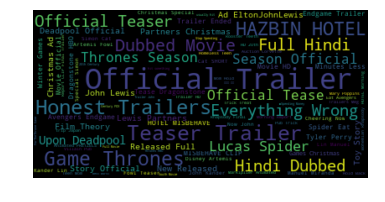

In [10]:
# Start with one review:
text = ' '.join(title_category_dict[category_list[0]])
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

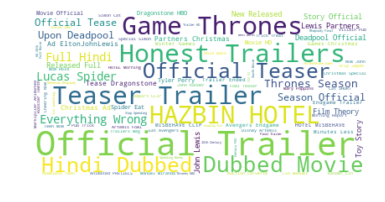

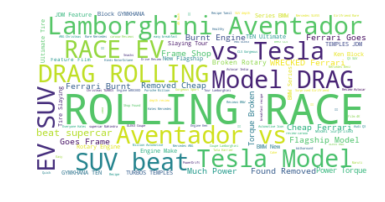

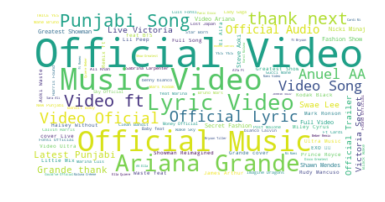

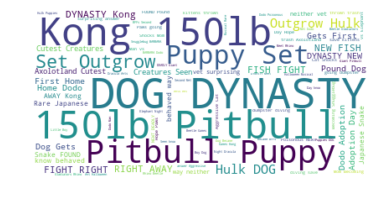

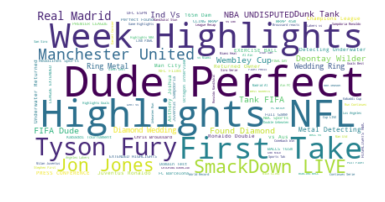

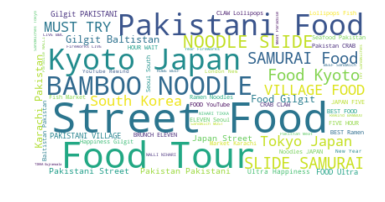

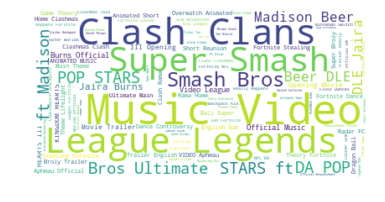

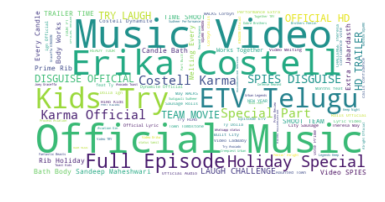

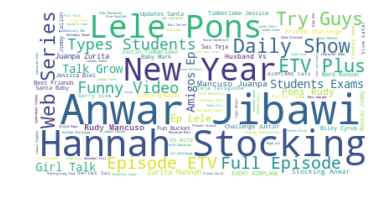

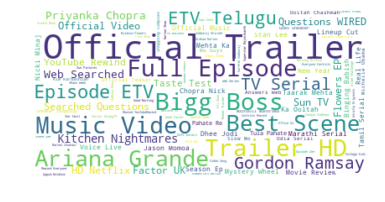

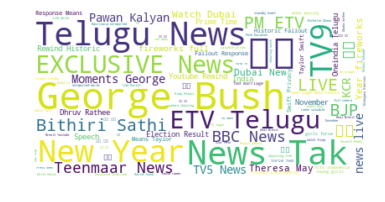

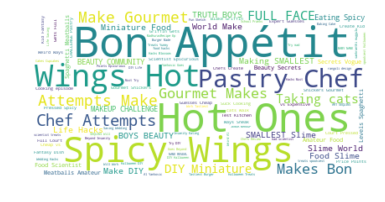

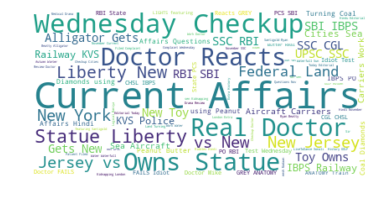

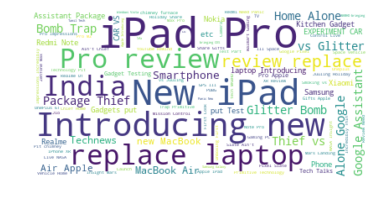

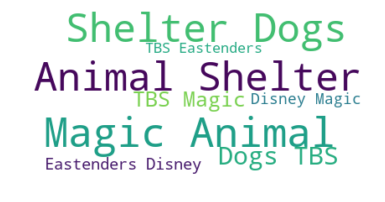

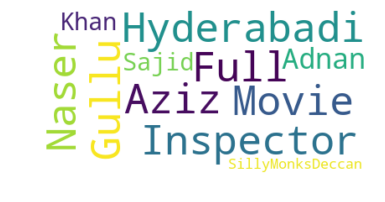

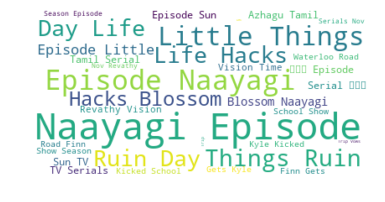

In [13]:
for category in category_list:
    text = ' '.join(title_category_dict[category])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    fname_plot = os.path.join(image_dir , 'category-'+str(category) + '.png' )
    wordcloud.to_file(fname_plot)
    